### 1011 복습

#### 1

In [1]:
items = ['TV','냉장고',' 전자레인지','컴퓨터', '선풍기','선풍기',' 믹서','믹서']

In [3]:
#1. LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(items)

array([2, 3, 1, 6, 5, 5, 0, 4], dtype=int64)

In [8]:
#2. OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = np.array(items).reshape(-1,1)

onehot_encoder = OneHotEncoder()
onehot_encoder.fit_transform(items)

onehot_labels = onehot_encoder.fit_transform(items)
onehot_labels.toarray()

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

#### 2

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris_data = load_iris()

dt_clf = DecisionTreeClassifier(random_state=42)

data = iris_data.data ## X
label = iris_data.target ## y

scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

#### 3

In [12]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris = iris['data']

iris_df = pd.DataFrame(iris)
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
#pandas의 appy를 사용하여 정규화
#방법1
iris_df.apply(lambda x: (x-x.min()) / (x.max() - x.min()))

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [17]:
#방법2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
iris_scalred = scaler.fit_transform(iris_df)
iris_scalred_df = pd.DataFrame(iris_scalred)
iris_scalred_df

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


#### 4

In [22]:
from sklearn.datasets import load_wine 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

wine = load_wine()

features = X = wine.data
labels = y = wine.target

dt_clf = DecisionTreeClassifier()

#4개의 구간으로 나누기
cross_val_score(dt_clf, features, labels, cv = 4)
cross_val_score(dt_clf, features, labels, scoring = 'accuracy', cv = 4)

array([0.82222222, 0.86666667, 0.93181818, 0.86363636])

In [ ]:
labels

In [29]:
pd.Series(labels).value_counts()

1    71
0    59
2    48
dtype: int64

In [ ]:
from collections import Counter
Counter(labels)    #딕셔너리 형태로 출력

In [ ]:
np.bincount(labels)

### 1012

### (5) 타이타닉 생존자 예측
titanic cvs 파일 : http://naver.me/5Zv8m3dH

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\admin'

In [3]:
titanic = pd.read_csv('./titanic_train.csv')    #'./' : 현재 위치
titanic[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#전처리
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Age의 결측치를 평균으로 바꾸자
m = titanic['Age'].mean().round(0)
titanic['Age'] = titanic['Age'].fillna(m)
titanic['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [9]:
titanic['Cabin'] = titanic['Cabin'].fillna('N')
titanic['Embarked'] = titanic['Embarked'].fillna('N')

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#Cabin 칼럼의 첫 글자만 따기
titanic['Cabin'] = titanic['Cabin'].str[:1]

In [15]:
#성별, 생존여부 별로 생존여부의 빈도수
titanic.groupby(['Sex', 'Survived'])[['Survived']].agg('count')

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [16]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

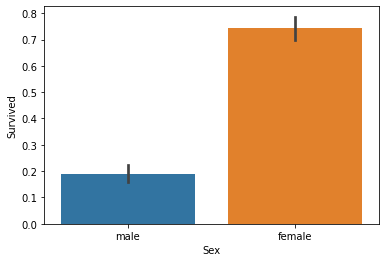

In [17]:
#성별 생존율
sns.barplot(data = titanic, x = 'Sex', y = 'Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

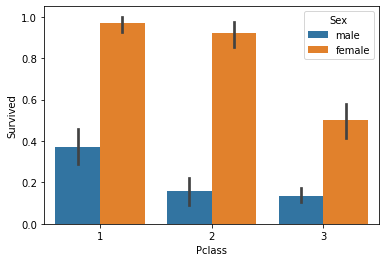

In [18]:
sns.barplot(data = titanic, x = 'Pclass', y = 'Survived', hue = 'Sex')

In [25]:
titanic['Age'].max()

80.0

In [27]:
#Age에 따라 값을 구분
pd.cut(titanic['Age'], bins = [-1, 5, 12, 18, 25, 35, 60, 100],
       labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly'], right = True)

ValueError: Bin labels must be one fewer than the number of bin edges

In [63]:
binss = [0, 5, 12, 18, 25, 35, 60, 100]
labelss = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
pd.cut(titanic['Age'], bins = binss, labels = labelss, right = True)

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888    Young Adult
889    Young Adult
890    Young Adult
Name: Age, Length: 891, dtype: category
Categories (7, object): ['Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Elderly']

<AxesSubplot:xlabel='Age_category', ylabel='Survived'>

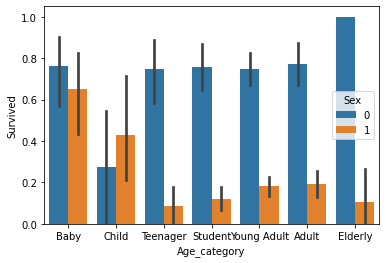

In [65]:
titanic['Age_category'] = pd.cut(titanic['Age'], bins = binss, labels = labelss, right = True)
sns.barplot(data = titanic, x = 'Age_category', y = 'Survived', hue = 'Sex', order = labelss)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        encoder = LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature])
        
    return df

encode_features(titanic)

In [ ]:
titanic = encode_features(titanic)

In [19]:
#'Cabin'를 LabelEncoding
titanic['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(titanic['Cabin'])

array([7, 2, 7, 2, 7, 7, 4, 7, 7, 7, 6, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3,
       7, 0, 7, 7, 7, 2, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 1, 2, 7, 7, 7, 7, 7, 1, 2, 7, 7, 7,
       5, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       2, 7, 7, 7, 4, 7, 7, 7, 0, 3, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7,
       2, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 4, 3, 7, 7, 7, 5, 7, 7, 7,
       7, 7, 7, 7, 3, 2, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 2, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 1, 7, 7, 7, 0, 7,
       7, 2, 7, 7, 7, 7, 7, 5, 7, 0, 7, 7, 7, 7, 7, 7, 7, 5, 1, 1, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 0, 7, 7, 7, 7, 7, 3, 7, 7, 3, 7,
       7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 2, 7, 7, 3, 7, 7, 6, 2, 7, 7, 7, 7, 1, 7, 7, 7, 7, 4, 1,
       7, 7, 7, 7, 2, 2, 7, 7, 7, 2, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7,
       7, 7, 7, 7, 7, 1, 3, 7, 7, 7, 7, 2, 2, 1, 7,

In [21]:
titanic['Cabin'] = encoder.fit_transform(titanic['Cabin']).tolist()
titanic[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,7,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,7,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,7,S


In [22]:
titanic['Sex'] = encoder.fit_transform(titanic['Sex']).tolist()
titanic['Embarked'] = encoder.fit_transform(titanic['Embarked']).tolist()
titanic[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [29]:
#'PassengerId', 'Name', 'Ticket' 칼럼 삭제
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
titanic[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


In [40]:
features = X = titanic.iloc[:, 1:]
#labels = y = titanic.Survived    #Series 형태, 다른표현 : titanic.iloc[:, :1]
labels = y = titanic.iloc[:, :1]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 11)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

In [44]:
#DecisionTreeClassifier 의 학습/예측 평가
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print("정확도: ", accuracy_score(y_test, pred).round(4))

정확도:  0.8156


In [66]:
#RandomForestClassifier 의 학습/예측 평가
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print("정확도: ", accuracy_score(y_test, pred).round(4))

정확도:  0.9719


C:\Users\admin\AppData\Local\Temp\ipykernel_6232\3633700131.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
#LogisticRegression 의 학습/예측 평가
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print("정확도: ", accuracy_score(y_test, pred).round(4))

정확도:  0.809


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [60]:
#features - 인덱스가 1,3,5번
features.iloc[[1,3,5], :]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,0,38.000000,1,0,71.2833,2,0
3,1,0,35.000000,1,0,53.1000,2,3
5,3,1,29.699118,0,0,8.4583,7,2


In [59]:
test_index

array([713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725,
       726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738,
       739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751,
       752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764,
       765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777,
       778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790,
       791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803,
       804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816,
       817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829,
       830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842,
       843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855,
       856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868,
       869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881,
       882, 883, 884, 885, 886, 887, 888, 889, 890])

In [ ]:
features.iloc[test_index, :]

In [ ]:
features.take(test_index)

In [57]:
#KFold 교차 검증
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5)
scores = []
count = 0
#KFold 교차 검증 수행
for train_index, test_index in kfold.split(titanic):
    X_trian, X_test = features.values[train_index], features.values[test_index]
    y_trian, y_test = labels.values[train_index], labels.values[test_index]
    #X_trian, X_test = features.take(train_index), features.take(test_index)
    #y_trian, y_test = labels.take(train_index), labels.take(test_index)
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    acc = accuracy_score(y_test, pred)
    scores.append(acc)
    count += 1
    print(f"{count}번째 개별 정확도: ", acc)

#scores
print()
print('평균 정확도: ', np.sum(scores).round(4))

1번째 개별 정확도:  0.9441340782122905
2번째 개별 정확도:  0.9382022471910112
3번째 개별 정확도:  0.9382022471910112
4번째 개별 정확도:  0.9550561797752809
5번째 개별 정확도:  0.9662921348314607

평균 정확도:  4.7419


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [61]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt_clf, features, labels, cv = 5)

array([0.75977654, 0.78089888, 0.81460674, 0.76966292, 0.82022472])

### 3. 평가
참고 자료 : http://naver.me/5G5skN0k<br>
분류의 성능 평가 지표 : 정확도(Accuracy), 오차행렬(Confusion Matrix), 정밀도, 재현율 등..

### (2) 오차행렬(Confusion Matrix)

정밀도(Precision) = True Positive / predicted positive = TP / (TP + FP) = a / (a+b)<br>

예측이 positive 한 것의 개수 중 (a+b)<br>
실제로 positive 한 것의 개수 (a)

재현율(Recall) = True Positive / actually positive = TP / (TP + FN) = a / (a+c)<br>
               = True Positive Rate = 민감도(Sensitivity)<br>
               
실제로 positive 한 것의 개수 중 (a+c)<br>
positive로 예측한 것의 개수 (a)

특이도(Specificity) = True Negative / actually negative = TN / (FP + TN) = d / (b+d)<br>
                    = True Negative Rate<br>
                    
실제로 negative 한 것의 개수 중 (b+d)<br>
negative로 예측한 것의 개수 (d)<br>

FPR(False Positive Rate) = 1 - Specificity = FP / (FP + TN) = b / (b+d)

정분류율 = <br>

오분류율 = 

In [68]:
y_test

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [71]:
pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0], dtype=int64)

In [72]:
accuracy_score(y_test, pred)

0.8089887640449438

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [77]:
confusion_matrix(y_test, pred)

array([[97, 18],
       [16, 47]], dtype=int64)

In [78]:
(97 + 47) / (97 + 47 + 18 + 16)

0.8089887640449438

In [82]:
Precision = 47 / (47 + 18)
Precision

0.7230769230769231

In [80]:
precision_score(y_test, pred)

0.7230769230769231

In [83]:
recall = 47 / (47 + 16)
recall

0.746031746031746

In [84]:
recall_score(y_test, pred)

0.746031746031746

In [94]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1_score_ = f1_score(y_test, pred)
    
    print(confusion)
    print()
    print(f" 정확도: {precision:.4f} \n 재현율: {recall:.4f} \n f1_스코어: {f1_score_:.4f}")

In [95]:
get_clf_eval(y_test, pred)

[[97 18]
 [16 47]]

 정확도: 0.7231 
 재현율: 0.7460 
 f1_스코어: 0.7344


### ROC 곡선과 AUC
참고 자료: http://naver.me/G5QBlDkv 

**predict_proba( ) 메소드 확인**

In [100]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
#print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
#print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
#pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
#print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [101]:
pred[:3]

array([0, 0, 0], dtype=int64)

In [102]:
pred_proba[:3]

array([[0.88578619, 0.11421381],
       [0.87568746, 0.12431254],
       [0.82031616, 0.17968384]])